## Introduction To Scikit-Learn(SkLearn)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
heart=pd.read_csv('./heart-disease.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X=heart.drop('target', axis='columns')
y=heart['target']

In [4]:
X.shape

(303, 13)

In [5]:
y.shape

(303,)

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

In [8]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
y_predicts=clf.predict(X_test)
y_predicts

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1])

In [10]:
clf.score(X_test,y_test)

0.8461538461538461

In [11]:
y_test

20     1
233    0
282    0
161    1
26     1
      ..
153    1
29     1
30     1
301    0
4      1
Name: target, Length: 91, dtype: int64

In [12]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [13]:
confusion_matrix(y_test,y_predicts)

array([[33,  8],
       [ 6, 44]])

In [14]:
accuracy_score(y_test,y_predicts)

0.8461538461538461

#### Trying to improve the model

In [15]:
np.random.seed(42)

for i in range(100,1100,100):
    print(f" Trying model with {i} estimators...")
    model=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f" Model accuracy on test set: {model.score(X_test,y_test) * 100:.2f} %")
    print("")

 Trying model with 100 estimators...
 Model accuracy on test set: 85.71 %

 Trying model with 200 estimators...
 Model accuracy on test set: 83.52 %

 Trying model with 300 estimators...
 Model accuracy on test set: 86.81 %

 Trying model with 400 estimators...
 Model accuracy on test set: 86.81 %

 Trying model with 500 estimators...
 Model accuracy on test set: 85.71 %

 Trying model with 600 estimators...
 Model accuracy on test set: 84.62 %

 Trying model with 700 estimators...
 Model accuracy on test set: 86.81 %

 Trying model with 800 estimators...
 Model accuracy on test set: 82.42 %

 Trying model with 900 estimators...
 Model accuracy on test set: 84.62 %

 Trying model with 1000 estimators...
 Model accuracy on test set: 85.71 %



#### Saving the trained model to a file for future use

In [16]:
import pickle

pickle.dump(clf, open('random_forest_classifier_model.pkl', 'wb'))

#### Loading the saved model from a file

In [17]:
loaded_model=pickle.load(open('random_forest_classifier_model.pkl', 'rb'))
loaded_model.score(X_test,y_test)

0.8461538461538461

### Getting the data ready to be used by the machines for learning

#### The three ways are:-
##### 1) Splitting the data into features(X) and labels(y)
##### 2) Filling(imputing) or disregarding the missing values
##### 3)Converting the non-numerical values(strings) to numerical values(Feature encoding or engineering)

In [18]:
X=heart.drop('target', axis='columns')
y=heart['target']

In [19]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
len(X_train)

212

In [22]:
len(X_test)

91

In [23]:
len(heart)

303

In [24]:
car=pd.read_csv('./car-sales-extended.csv')
car.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
len(car)

1000

In [26]:
car.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [27]:
X=car.drop('Price', axis='columns')
y=car['Price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
len(X_train)

700

In [30]:
len(X_test)

300

In [31]:
# from sklearn.ensemble import RandomForestRegressor

# clf=RandomForestRegressor()
# clf.fit(X_train,y_train)
# clf.score(X_test,y_test)

##### Turning the string type categories into number/integer type

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot, categorical_features)] ,remainder='passthrough')

transform_X=transformer.fit_transform(X)
transform_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [33]:
pd.DataFrame(transform_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
len(pd.DataFrame(transform_X))

1000

In [35]:
dummies=pd.get_dummies(car[['Make','Colour','Doors']])

In [36]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [37]:
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.3)

In [38]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.22132100082406125

## Handling missing values in a dataset

### Two ways to handling the missing data:-

#### 1) Fill them with some value(imputation)
#### 2) Remove the samples with missing data altogether

In [39]:
car_missing=pd.read_csv('./car-sales-extended-missing-data.csv')
car_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
len(car_missing.isna().sum())

5

In [42]:
len(car_missing.isna())

1000

In [43]:
X=car_missing.drop('Price', axis='columns')
y=car_missing['Price']

In [44]:
len(X)

1000

In [45]:
len(y)

1000

In [46]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot, categorical_features)] ,remainder='passthrough')

transform_X=transformer.fit_transform(X)
transform_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [48]:
transform_X.shape

(1000, 16)

In [49]:
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [50]:
transform_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Filling the missing data with pandas

In [51]:
car_missing['Make'].fillna('missing', inplace=True)
car_missing['Colour'].fillna('missing', inplace=True)
car_missing['Odometer (KM)'].fillna(car_missing['Odometer (KM)'].mean(), inplace=True)
car_missing['Doors'].fillna(4, inplace=True)

In [52]:
car_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

#### Removing the Price rows with empty values

In [53]:
car_missing.dropna(inplace=True)

In [54]:
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
len(car_missing)

950

In [56]:
X=car_missing.drop('Price', axis='columns')
y=car_missing['Price']

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot, categorical_features)] ,remainder='passthrough')

transform_X=transformer.fit_transform(X)
transform_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

#### Fill missing values with SkLearn

In [58]:
car_missing2=pd.read_csv('./car-sales-extended-missing-data.csv')
car_missing2

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [59]:
car_missing2.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [60]:
type(car_missing2)

pandas.core.frame.DataFrame

In [61]:
car_missing2.dropna(subset=['Price'], inplace=True)
car_missing2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [62]:
X=car_missing2.drop('Price', axis='columns')
y=car_missing2['Price']

#### Fill missing values with skLearn

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [64]:
# Fill categorical values with 'missing' and 'numerical' values with mean
cat_imputer=SimpleImputer(strategy='constant', fill_value='missing')
door_imputer=SimpleImputer(strategy='constant', fill_value=4)
num_imputer=SimpleImputer(strategy='mean')

cat_features=['Make','Colour']
door_feature=['Doors']
num_features=['Odometer (KM)']

imputer=ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features),
])

transform_X=imputer.fit_transform(X)
transform_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [65]:
filled=pd.DataFrame(transform_X,columns=['Make','Colour','Doors','Odometer (KM)'])

In [66]:
filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [67]:
filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot, categorical_features)] ,remainder='passthrough')

transform_X=transformer.fit_transform(filled)
transform_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [69]:
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.3)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.2396004790354026

### Choosing the right estimator/algorithm for solving the machine learning problem

#### Sklearn uses estimator as another term for machine learning model or algorithm. 

### Types of problems:-

#### 1) Classification -> Predicting whether a sample is one thing or another(We are trying to figure out if a person has heart disease or not).
#### 2) Regression -> Predicting a number(Predicting the price of a car or the price of a house)

### Choosing the Right estimator from skLearn:-

<img src='./Images/Choosing_Right_Estimator.png' />

#### https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Picking a machine learning model for a regression problem

In [70]:
from sklearn.datasets import load_boston
boston= load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [71]:
type(boston)

sklearn.utils.Bunch

In [72]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [73]:
boston.values()

dict_values([array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 1

In [74]:
boston_df=pd.DataFrame(boston['data'], columns=boston['feature_names']) 
boston_df['target']= pd.Series(boston['target'])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 1)This is a Regression problem as we are trying to find out the price of a house in Boston

In [75]:
len(boston_df)

506

### Ridge Regression Model

In [76]:
from sklearn.linear_model import Ridge

np.random.seed(40)

X=boston_df.drop('target', axis='columns')
y=boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

ridge=Ridge()
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

0.7197594415646311

### Random Forest Regression Model

In [77]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(40)

X=boston_df.drop('target', axis='columns')
y=boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

forest=RandomForestRegressor()
forest.fit(X_train,y_train)
forest.score(X_test,y_test)


0.8453375436568422

### 2)Classification Problem as we are tying to found out if a person has heart disease or not.

In [78]:
heart_df=pd.read_csv('./heart-disease.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Linear SVC classification Algorithm

In [79]:
from sklearn.svm import LinearSVC

X=heart_df.drop('target', axis='columns')
y=heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

linear_svm=LinearSVC(max_iter=5000)
linear_svm.fit(X_train, y_train)
linear_svm.score(X_test,y_test)


/home/arghanath/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5164835164835165

In [80]:
from sklearn.svm import LinearSVC

X=heart_df.drop('target', axis='columns')
y=heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

linear_svm=LinearSVC()
linear_svm.fit(X_train, y_train)
linear_svm.score(X_test,y_test)


/home/arghanath/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.4725274725274725

In [81]:
from sklearn.svm import LinearSVC

X=heart_df.drop('target', axis='columns')
y=heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

linear_svm=LinearSVC(dual=True)
linear_svm.fit(X_train, y_train)
linear_svm.score(X_test,y_test)


/home/arghanath/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7912087912087912

In [82]:
from sklearn.svm import LinearSVC

X=heart_df.drop('target', axis='columns')
y=heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

linear_svm=LinearSVC(max_iter=5000,dual=True)
linear_svm.fit(X_train, y_train)
linear_svm.score(X_test,y_test)


/home/arghanath/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.6593406593406593

### Random Forest Classifier Algorithm

In [83]:
from sklearn.ensemble import RandomForestClassifier

X=heart_df.drop('target', axis='columns')
y=heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

forest_class=RandomForestClassifier()
forest_class.fit(X_train, y_train)
forest_class.score(X_test,y_test)

0.8351648351648352

### SVC Algorithm

In [84]:
from sklearn.svm import SVC

X=heart_df.drop('target', axis='columns')
y=heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

svm=SVC()
svm.fit(X_train, y_train)
svm.score(X_test,y_test)


0.5934065934065934

### Using the model to make predictions with the data

#### Two ways to make predictions:-

##### 1) predict()
##### 2) predict_proba()

In [85]:
forest_class.predict(X_test)  #Predictions

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0])

In [86]:
np.array(y_test)  # Truth values

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0])

In [87]:
y_preds=forest_class.predict(X_test)
np.mean(y_preds == y_test)

0.9560439560439561

In [88]:
forest_class.score(X_test,y_test)

0.9560439560439561

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.9560439560439561

### Making predictions with the predict_proba() -> It returns a probability of a classification label

In [90]:
forest_class.predict_proba(X_test[:5])

array([[0.07, 0.93],
       [0.97, 0.03],
       [0.92, 0.08],
       [0.06, 0.94],
       [0.86, 0.14]])

In [91]:
forest_class.predict(X_test[:5])

array([1, 0, 0, 1, 0])

In [92]:
forest.predict(X_test[:5])

array([32.179, 32.179, 32.179, 32.243, 32.179])

In [93]:
# forest.predict_proba(X_test[:5])

In [94]:
X_test.shape

(91, 13)

In [95]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3


In [96]:
y_preds=forest.predict(X_test)

In [97]:
y_preds[:5]

array([32.179, 32.179, 32.179, 32.243, 32.179])

In [98]:
np.array(y_test[:5])

array([1, 0, 0, 1, 0])

In [99]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

31.740384615384595

## Evaluating the model we have trained

### Three ways to evaluate skLearn models/estimators:-
#### 1)Estimator 'score' method
#### 2)The 'scoring' parameter
#### 3)Problem-specific metric functions

## 1) 'Score' method:-

#### The 'score' function on every machine learning model has some kind of default evaluation metric build into it.

In [100]:
forest_class.score(X_test,y_test)

0.9560439560439561

In [101]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(40)

X=boston_df.drop('target', axis='columns')
y=boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [102]:
forest.score(X_test,y_test)

0.8453375436568422

## 2) The 'Scoring' parameter

In [103]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

X=heart_df.drop('target', axis='columns')
y=heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

forest_class=RandomForestClassifier()
forest_class.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
forest_class.score(X_test,y_test)

0.8461538461538461

### Cross Validation or K-fold Validation(k -> is the number of folds we perform on the dataset. It is coming from the hyper-parameter 'cv' of the 'cross_val_score' function)

In [105]:
cross_val_score(forest_class,X,y)

array([0.83606557, 0.90163934, 0.80327869, 0.78333333, 0.76666667])

In [106]:
cross_val_score(forest_class,X,y,cv=10)

array([0.87096774, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.76666667, 0.9       , 0.7       , 0.8       ])

In [107]:
# Default scoring parameter of classifier= mean accuracy
forest_class.score(X_test,y_test)

0.8461538461538461

In [108]:
cross_val_score(forest_class,X,y,cv=10, scoring=None)

array([0.90322581, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.76666667])

### If the 'scoring' hyper-parameter is set to 'None' then it is going to use the default evaluation metric for cross validation for the classifier that we are using. We are using the 'RandomForestClassifier' here so the default metric of the classifier is 'mean accuracy', we can check it by looking at the doc string of the 'forest_class.score(X_test,y_test)' classifier's model.score().

## Classification model evaluation metrics

* Accuracy
* Area under ROC Curve
* Confusion matrix
* Classification report

**Accuracy**

#### Accuracy means that for a given random sample that the model hasn't seen before, how likely is it(model) to predict the right label 

In [109]:
cross_val_score=cross_val_score(forest_class,X,y)

In [110]:
np.mean(cross_val_score), forest_class.score(X_test,y_test)

(0.828087431693989, 0.8461538461538461)

**Area Under the receiver operating characteristic Curve(AUC/ROC)**

* Area Under Curve(AUC)
* ROC curve

##### ROC curves are a comparison of a model's true positive rate(tpr) versus a model's false positive rate(fpr).

* True positive=model predicts 1 when truth is 1
* False positive=model predicts 1 when truth is 0
* True negative=model predicts 0 when truth is 0
* False negative=model predicts 0 when truth is 1

In [111]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3


In [112]:
from sklearn.metrics import roc_curve

y_proba=forest_class.predict_proba(X_test)
y_proba[:5]

array([[0.66, 0.34],
       [0.26, 0.74],
       [0.48, 0.52],
       [0.12, 0.88],
       [0.25, 0.75]])

In [113]:
y_proba_pos=y_proba[:,1]
y_proba_pos[:5]

array([0.34, 0.74, 0.52, 0.88, 0.75])

In [114]:
fpr,tpr,thresholds=roc_curve(y_test,y_proba_pos)

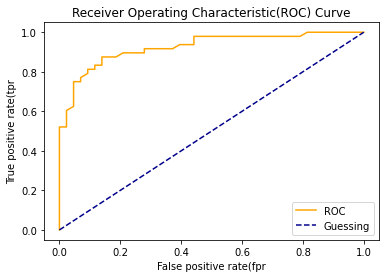

In [115]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
        Plots a ROC curve given the false postive(fpr) and true positive rates(tpr) of a model.
    """

    # ROC curve
    plt.plot(fpr,tpr, color='orange', label='ROC')

    #Plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')

    plt.xlabel('False positive rate(fpr')
    plt.ylabel('True positive rate(tpr')
    plt.title('Receiver Operating Characteristic(ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)


In [116]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_pos)

0.9251453488372093

#### The perfect ROC curve and AUC score will be 1.0

**Confusion Matrix**

##### A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving us an idea of where the model is getting confused

In [117]:
from sklearn.metrics import confusion_matrix

y_preds=forest_class.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[35,  8],
       [ 6, 42]])

In [118]:
# Visualizing the confusing matrix for a better understanding of it.

pd.crosstab(y_test,y_preds,rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,35,8
1,6,42


## Installing a library from within a notebook itself, instead of going to a terminal. Install a conda package from a Jupyter notebook.

In [119]:
!ls

car-sales-extended.csv		     Introduction.ipynb
car-sales-extended-missing-data.csv  random_forest_classifier_model.pkl
car-sales-missing-data.csv	     scikit-learn_notes.ipynb
heart-disease.csv		     sklearn.txt
Images


In [120]:
import sys
%conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


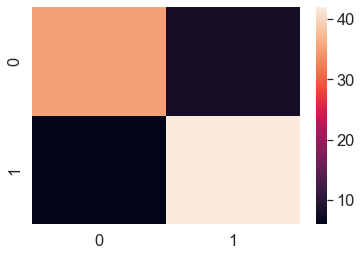

In [121]:
import seaborn as sns

# Setting the font scale

sns.set(font_scale=1.5)

# Confusion matrix

conf_mat=confusion_matrix(y_test,y_preds)

# Plotting with seaborn library

sns.heatmap(conf_mat);

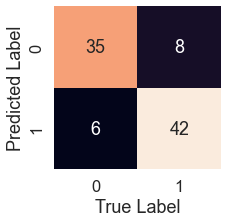

In [122]:
def plot_conf_mat(conf_mat):
    """Plots a confusion matrix using Seaborn's heatmap function"""

    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,annot=True, cbar=False) # Annotate the boxses with conf_mat info

    plt.xlabel('True Label')
    plt.ylabel('Predicted Label');

plot_conf_mat(conf_mat) 

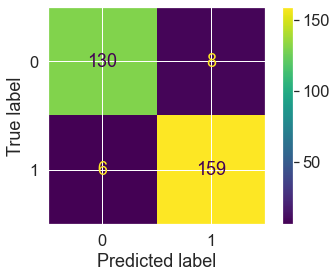

In [123]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(forest_class, X,y)

#### Confusion matrix shows us where the model we have created is getting confused while predicting on the test dataset.

**Classification Report**

In [124]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        43
           1       0.84      0.88      0.86        48

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91



## Regression Model Evaluation metrics

* R^2(r-squared) or co-efficient of determination
* Mean Absolute Error(MAE)
* Mean Squared Error(MSE)

**R^2**

##### R^2 does is that it compares the model's predictions to the mean of the target. Values can range from negative infinity(very poor model) to 1. For example, if all the model does is predict the mean of the targets, it's R^2 value would be 0. And if the model perfectly predicts a range of numbers it's R^2 value would be 1.

In [125]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

X=boston_df.drop('target', axis='columns')
y=boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf=RandomForestRegressor()
clf.fit(X_train,y_train)

RandomForestRegressor()

In [126]:
clf.score(X_test,y_test)

0.882899330092286

In [127]:
import numpy as np

In [128]:
from sklearn.metrics import r2_score

y_test_mean=np.full(len(y_test),y_test.mean())

In [129]:
y_test.mean()

21.407894736842103

In [130]:
y_test_mean

array([21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40789474,
       21.40789474, 21.40789474, 21.40789474, 21.40789474, 21.40

In [131]:
r2_score(y_test,y_test_mean)

0.0

In [132]:
r2_score(y_test,y_test)

1.0

**Mean Absolute Error(MAE)**

##### It is defined as the average of the absolute differences between predictions and actual values and so it gives us an idea of how wrong the model's predictions are.

In [133]:
from sklearn.metrics import mean_absolute_error

y_preds=clf.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae


2.073052631578947

In [134]:
df= pd.DataFrame(data={'actual values': y_test, "predicted values": y_preds})
df['difference']=df['predicted values'] - df['actual values']

In [135]:
df

,actual values,predicted values,difference
173,23.6,22.688,-0.912
274,32.4,30.901,-1.499
491,13.6,16.760,3.160
72,22.8,23.783,0.983
452,16.1,17.561,1.461
...,...,...,...
441,17.1,13.481,-3.619
23,14.5,15.291,0.791
225,50.0,43.264,-6.736
433,14.3,15.711,1.411


**Mean Squared Error(MSE)**

In [136]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_preds)
mse


8.725533407894737

In [137]:
dfNew= pd.DataFrame(data={'actual values': y_test, "predicted values": y_preds})
dfNew['difference']=(dfNew['predicted values'] - dfNew['actual values'])**2

In [138]:
dfNew['difference'].mean()

8.72553340789473

## Tid-bit for regression models:-

#### We want to minimize mean square errors as well as minimize mean absolute error while maximizing the R^2(r squared) or co-efficient of determination

### Using the 'scoring' parameter

### Classification Model

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_df.drop('target', axis='columns')
y=heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [142]:
clf.score(X_test,y_test)

0.8241758241758241

In [147]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [148]:
cv_mean=np.mean(cv_acc)
cv_mean

0.8248087431693989

##### When the 'scoring' parameter is left to 'None' then it uses the classifier's or the estimator's default parameter from the '.score()' to evaluate using the cross validation

## Accuracy

In [149]:
np.random.seed(42)
cv_accuracy=cross_val_score(clf,X,y,cv=5, scoring='accuracy')
cv_accuracy

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [150]:
np.mean(cv_accuracy)

0.8248087431693989

## Precision

In [154]:
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,cv=5, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [155]:
np.mean(cv_precision)

0.8329547346025924

## Recall

In [156]:
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y,cv=5, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [158]:
np.mean(cv_recall)

0.8545454545454545

## F1 

In [159]:
np.random.seed(42)
cv_f1=cross_val_score(clf,X,y,cv=5, scoring='f1')
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [160]:
np.mean(cv_f1)

0.8426854603423346

### Regression Model

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= boston_df.drop('target', axis='columns')
y=boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_reg=RandomForestRegressor()
clf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [162]:
clf_reg.score(X_test,y_test)

0.882899330092286

In [164]:
np.random.seed(42)
cv_r2=cross_val_score(clf_reg,X,y, cv=5 ,scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [165]:
np.mean(cv_r2)

0.6243870737930857

In [166]:
np.random.seed(42)
cv_r2=cross_val_score(clf_reg,X,y, cv=5 ,scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [167]:
np.mean(cv_r2)

0.6243870737930857

## Mean Absolute Error

In [169]:
np.random.seed(42)
cv_mae=cross_val_score(clf_reg,X,y, cv=5 ,scoring='neg_mean_absolute_error')
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [170]:
np.mean(cv_mae)

-3.0312352552902335

## Mean Squared Error

In [171]:
np.random.seed(42)
cv_mse=cross_val_score(clf_reg,X,y, cv=5 ,scoring='neg_mean_squared_error')
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

In [172]:
np.mean(cv_mse)

-21.261442856882137

## Different evaluation metrics from skLearn library functions(Metric Functions)

**Classification evaluation functions using Metric Functions**

In [173]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_df.drop('target', axis='columns')
y=heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_class=RandomForestClassifier()
clf_class.fit(X_train,y_train)

RandomForestClassifier()

In [174]:
clf_class.score(X_test,y_test)

0.8524590163934426

In [178]:
y_preds=clf_class.predict(X_test)
y_preds[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

#### Evaluation the classifier model

In [179]:
print(f'Accuracy: {accuracy_score(y_test,y_preds)*100: .2f}%')
print(f'Precision: {precision_score(y_test,y_preds)}')
print(f'Recall: {recall_score(y_test,y_preds)}')
print(f'F1: {f1_score(y_test,y_preds)}')

Accuracy:  85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions using Metric Functions**

In [181]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=boston_df.drop('target', axis='columns')
y=boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_reg=RandomForestRegressor()
clf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [182]:
clf_reg.score(X_test,y_test)

0.8654448653350507

In [183]:
y_preds=clf_class.predict(X_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

### Evaluating the Regression model

In [185]:
print(f'R^2: {r2_score(y_test,y_preds)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_preds)}')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_preds)}')

R^2: 0.8654448653350507
Mean Absolute Error: 2.136382352941176
Mean Squared Error: 9.867437068627442
